In [1]:
from statesegmentation import GSBS
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
df = pd.read_csv('../Datasets/Original/2.4_Original_data.csv')
df

,frame_number,"('nose', 'x')","('nose', 'y')","('nose', 'likelihood')","('H1R', 'x')","('H1R', 'y')","('H1R', 'likelihood')","('H2R', 'x')","('H2R', 'y')","('H2R', 'likelihood')",...,"('tail', 'y')","('tail', 'likelihood')","('S2', 'x')","('S2', 'y')","('S2', 'likelihood')","('S1', 'x')","('S1', 'y')","('S1', 'likelihood')",mouse_no,Freezing_label
0,0,655.465454,596.169556,0.375685,1.441294,569.380432,0.672269,1.100614,536.281982,0.150927,...,374.538391,0.926555,648.882812,442.020569,0.960436,673.570740,463.700592,0.986622,2.4,0
1,1,655.465454,598.723022,0.137304,653.664246,573.473999,0.127421,630.188904,546.845093,0.087558,...,381.053955,0.720367,652.826843,442.020569,0.975218,675.550964,463.700592,0.988386,2.4,0
2,2,655.465454,598.850098,0.141754,653.664246,573.473999,0.189718,655.954224,546.845093,0.132388,...,410.980377,0.730994,653.333252,442.020569,0.988719,675.550964,463.700592,0.991137,2.4,0
3,3,655.034790,599.351257,0.328517,1.797714,569.380432,0.105963,655.954224,536.281982,0.118531,...,410.980377,0.651599,653.333252,433.984344,0.964876,675.550964,459.856781,0.996633,2.4,0
4,4,655.034790,598.850098,0.093978,653.664246,569.278564,0.098178,655.954224,515.741516,0.097626,...,410.980377,0.694267,652.826843,433.482178,0.947889,674.733032,454.161774,0.993485,2.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,172.412689,492.601685,0.980347,161.639145,491.723602,0.962631,158.205261,483.657898,0.995811,...,344.952820,0.175626,188.598572,399.736053,0.837555,148.013779,398.291473,0.784131,2.4,0
11246,11246,158.804474,496.747742,0.966895,151.414688,493.952057,0.901850,147.500107,488.071167,0.989264,...,344.952820,0.511682,188.598572,400.137146,0.830551,148.013779,398.291473,0.955154,2.4,0
11247,11247,158.229584,499.269562,0.884514,146.388336,495.241730,0.989397,146.350800,487.560333,0.999033,...,364.305450,0.365775,188.401077,399.936371,0.862037,149.812454,404.461731,0.975054,2.4,0
11248,11248,158.204834,499.269562,0.810430,145.989441,495.241730,0.979529,144.811569,487.560333,0.997931,...,364.305450,0.596857,188.401077,399.936371,0.761463,149.812454,404.461731,0.990626,2.4,0


In [3]:
df_downsampled = df[::100].copy()

if len(df) % 100 != 0:
    last_frame = df.iloc[[-1]].copy()
    df_downsampled = pd.concat([df_downsampled, last_frame], ignore_index=True)

time_series = df_downsampled.iloc[:,1:-2].values

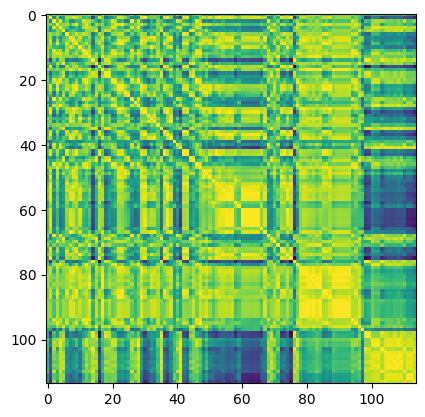

In [4]:
corr = np.corrcoef(time_series)
plt.imshow(corr)

In [5]:
states = GSBS(x=time_series, kmax=int(time_series.shape[0]/2), statewise_detection=True)
states.fit()

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:04<00:00, 12.24it/s]


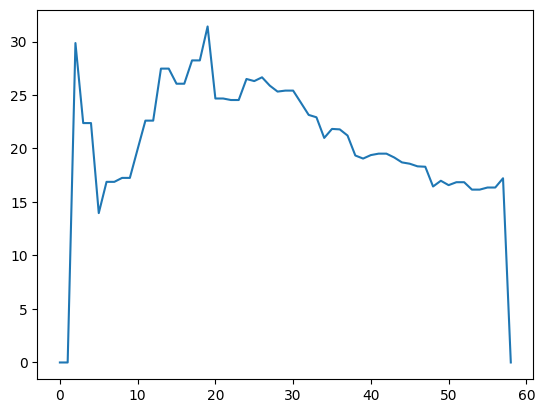

In [6]:
plt.plot(states.tdists)

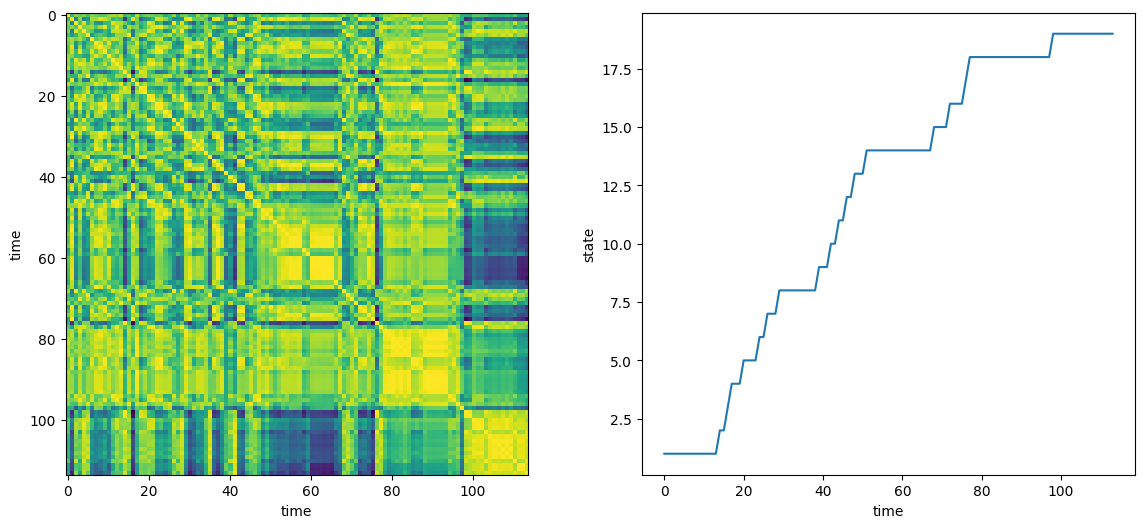

In [7]:
#plot results
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.imshow(np.corrcoef(time_series))
ax1.set_xlabel('time')
ax1.set_ylabel('time')
ax2.plot(states.states)
ax2.set_ylabel('state')
ax2.set_xlabel('time')
plt.show()

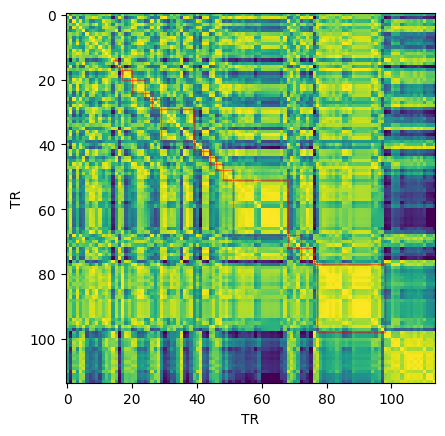

In [10]:
corr = np.corrcoef(time_series)
bounds = np.where(states.all_bounds[states.tdists.argmax()] > 0)[0]

fig, ax = plt.subplots()

# Plot the matrix
ax.imshow(corr, vmin=0, vmax=1)
ax.imshow(corr, interpolation='none', vmin=0, vmax=1)
ax.set_xlabel('TR')
ax.set_ylabel('TR')


for i in range(len(bounds)-1):
    rect = patches.Rectangle(
        (bounds[i], bounds[i]),
        bounds[i + 1] - bounds[i],
        bounds[i + 1] - bounds[i],
        linewidth=1, edgecolor='r', facecolor='none',alpha=0.5
    )
    ax.add_patch(rect)
    
plt.show()